In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve

In [111]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [112]:
train.shape

(58645, 13)

In [113]:
test.shape

(39098, 12)

In [114]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [115]:
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Data preprocessing 

### 1. Null values

In [116]:
train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [117]:
test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2. Remove id

In [118]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [119]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [120]:
test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


### 3. Outliers

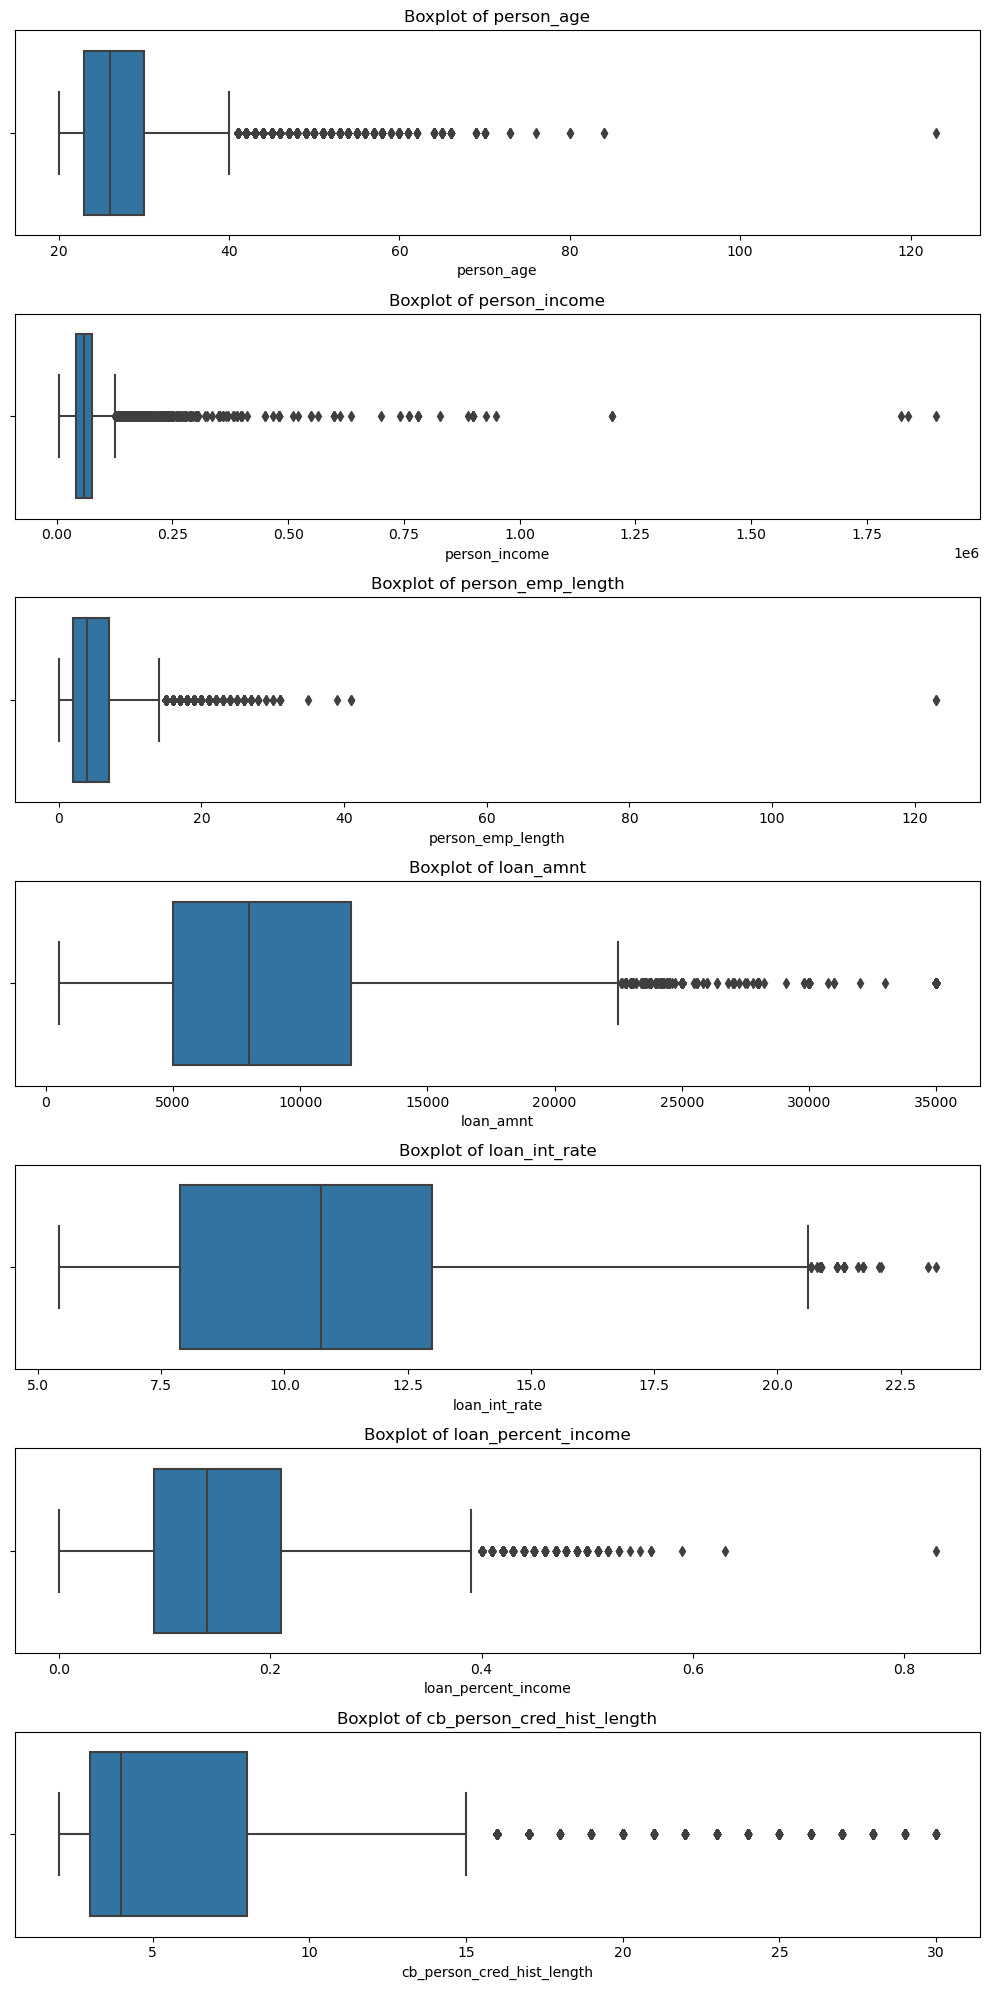

In [121]:
# train
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()

plt.show()


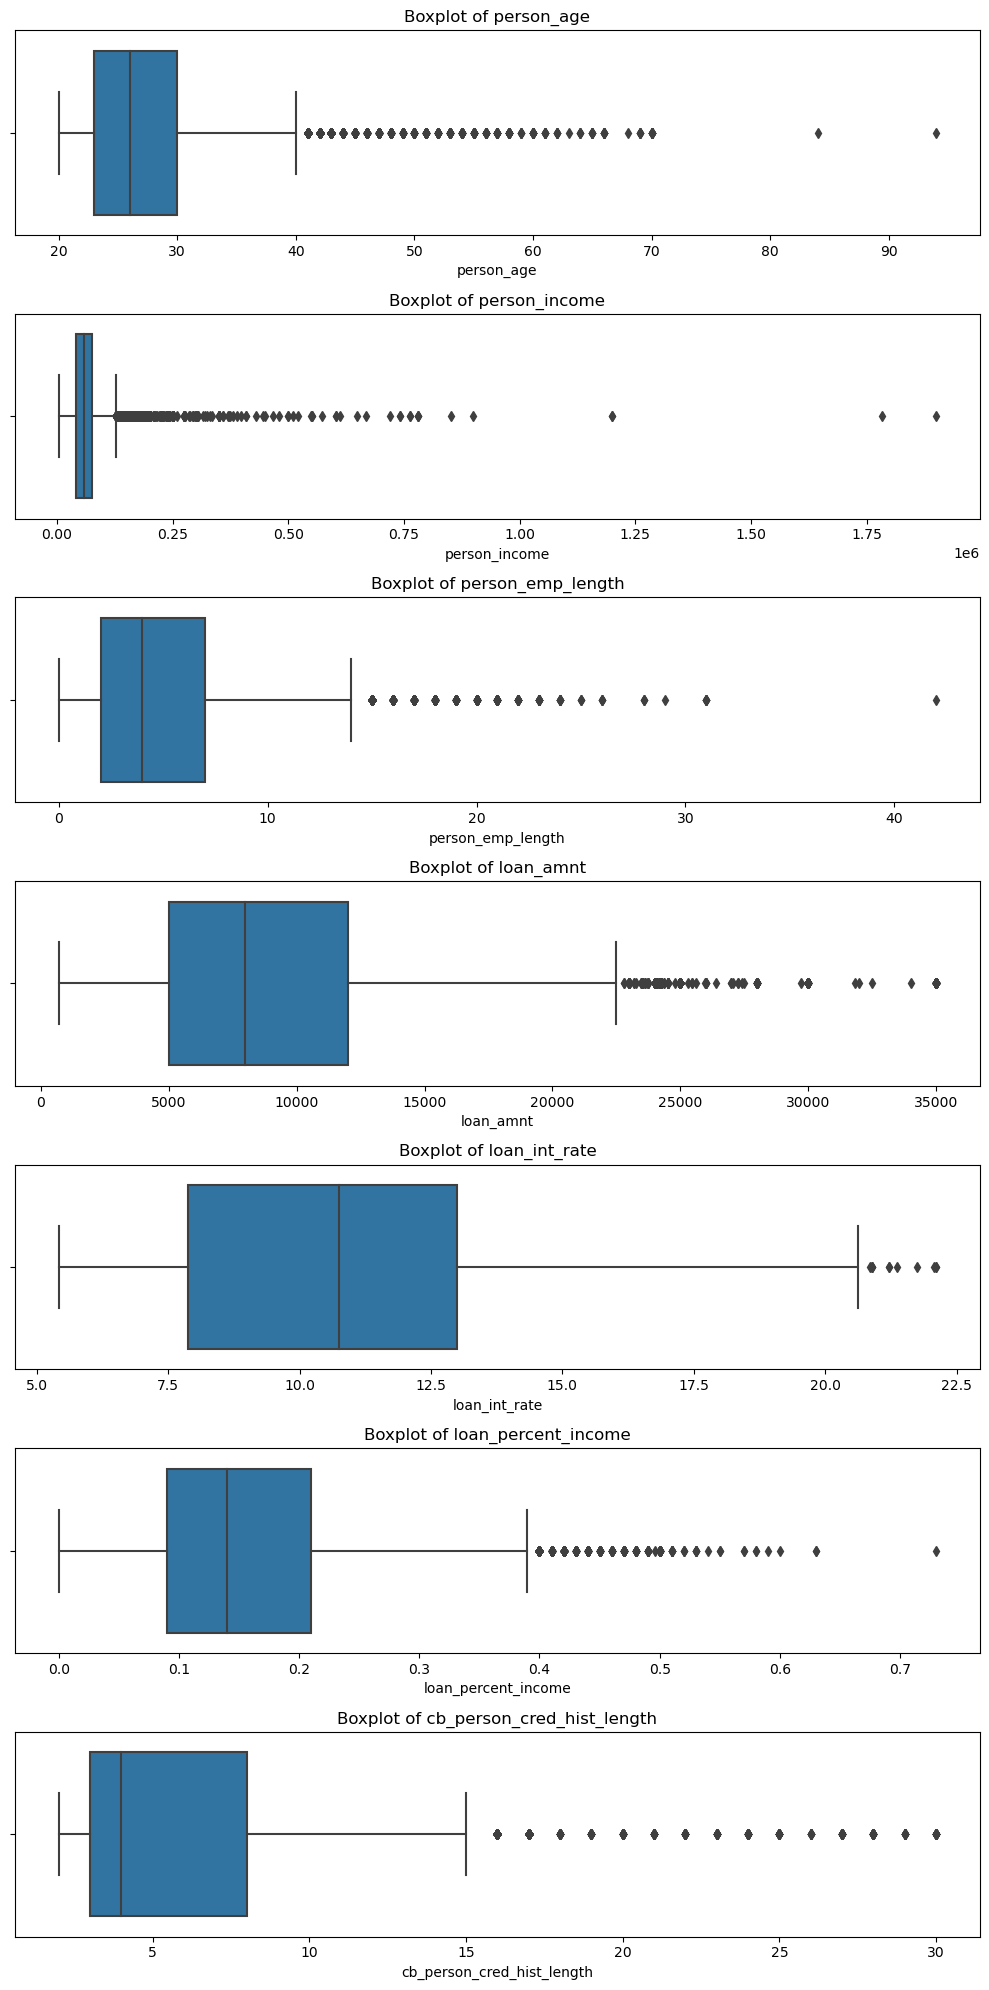

In [122]:
# test
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.boxplot(x=test[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()

plt.show()


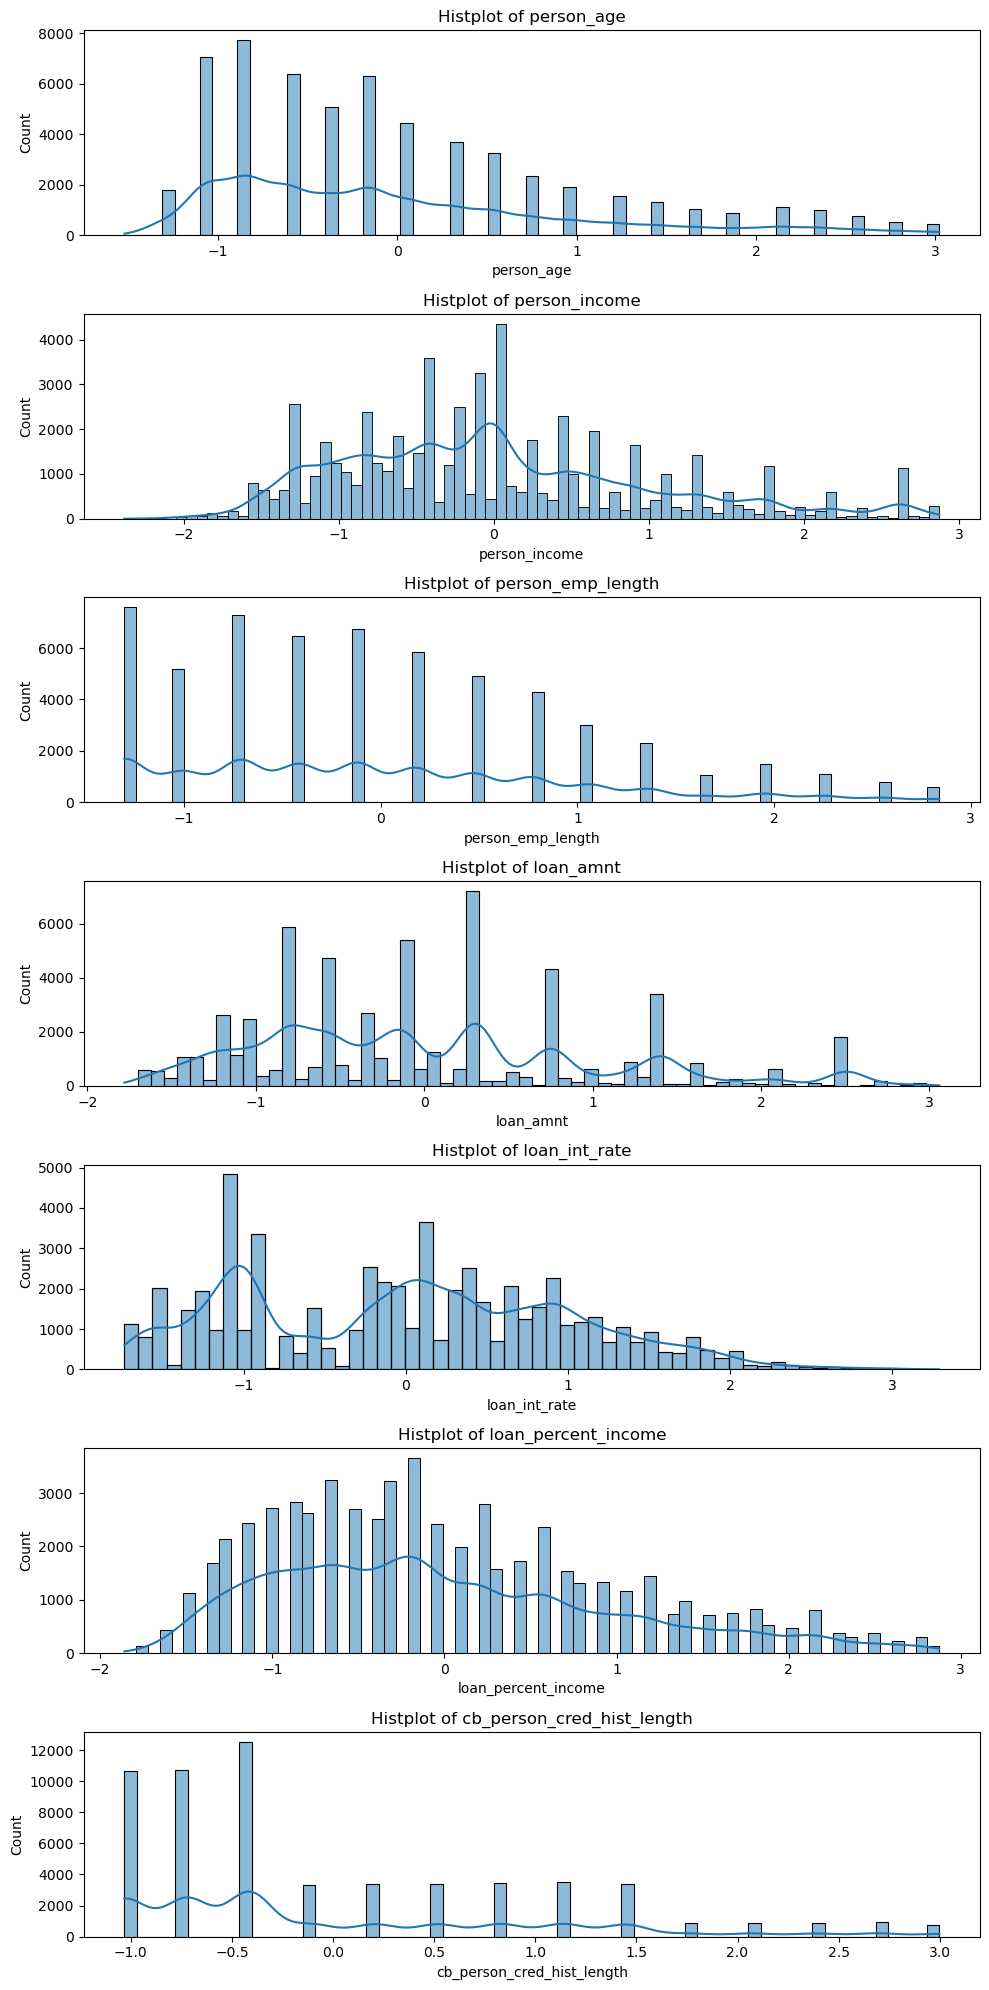

In [145]:
# train
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.histplot(x=train[col],kde=True)
    plt.title(f'Histplot of {col}')

plt.tight_layout()

plt.show()


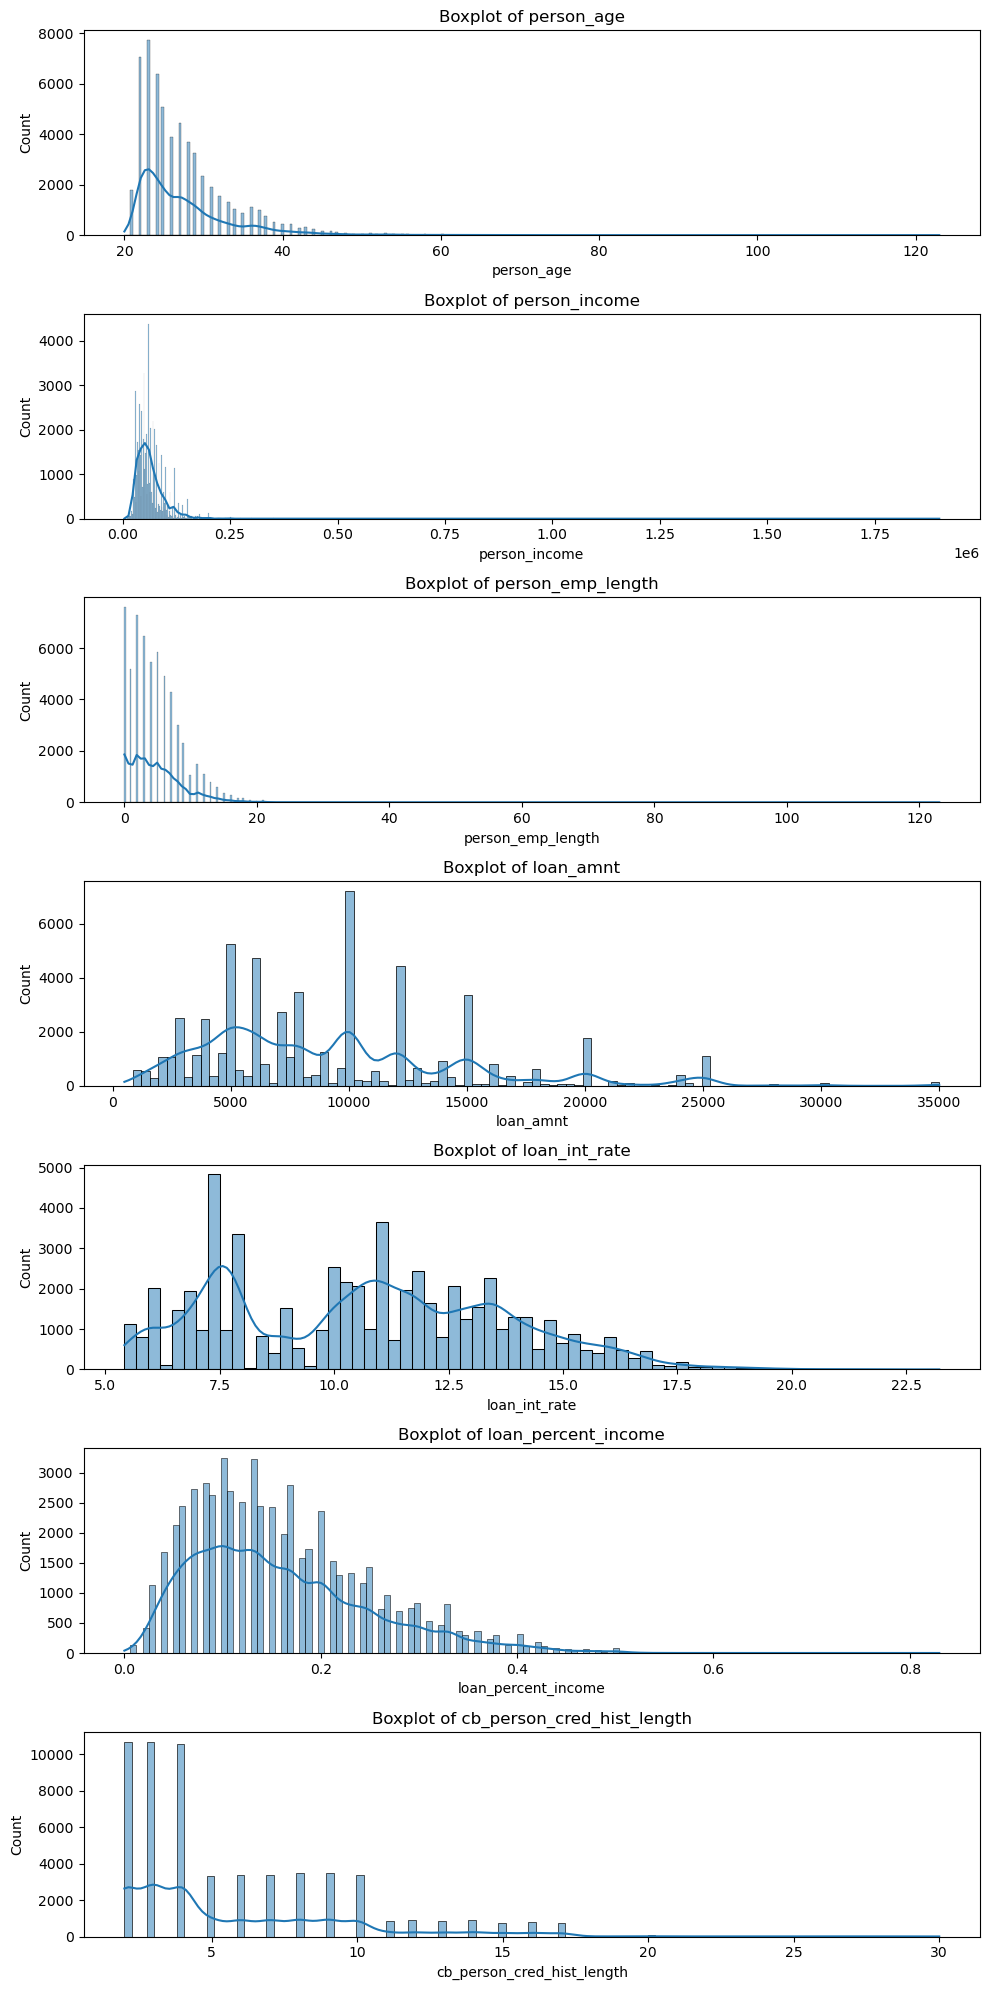

In [124]:
# test
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.histplot(x=train[col],kde=True)
    plt.title(f'Histplot of {col}')

plt.tight_layout()

plt.show()


In [125]:
# detect outliers and replace it with median for train
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for col in columns:
    
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    median_value = train[col].median()
    
    train[col] = np.where((train[col] < lower_bound) | (train[col] > upper_bound), median_value, train[col])

train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0


In [126]:
# detect outliers and replace it with median for test
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for col in columns:
    
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    median_value = test[col].median()
    
    test[col] = np.where((test[col] < lower_bound) | (test[col] > upper_bound), median_value, test[col])

test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,F,8000.0,15.76,0.36,N,2.0
1,26.0,96000.0,MORTGAGE,6.0,PERSONAL,C,10000.0,12.68,0.10,Y,4.0
2,26.0,30000.0,RENT,5.0,VENTURE,E,4000.0,17.19,0.13,Y,2.0
3,33.0,50000.0,RENT,4.0,DEBTCONSOLIDATION,A,7000.0,8.90,0.14,N,7.0
4,26.0,102000.0,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000.0,16.32,0.15,Y,4.0


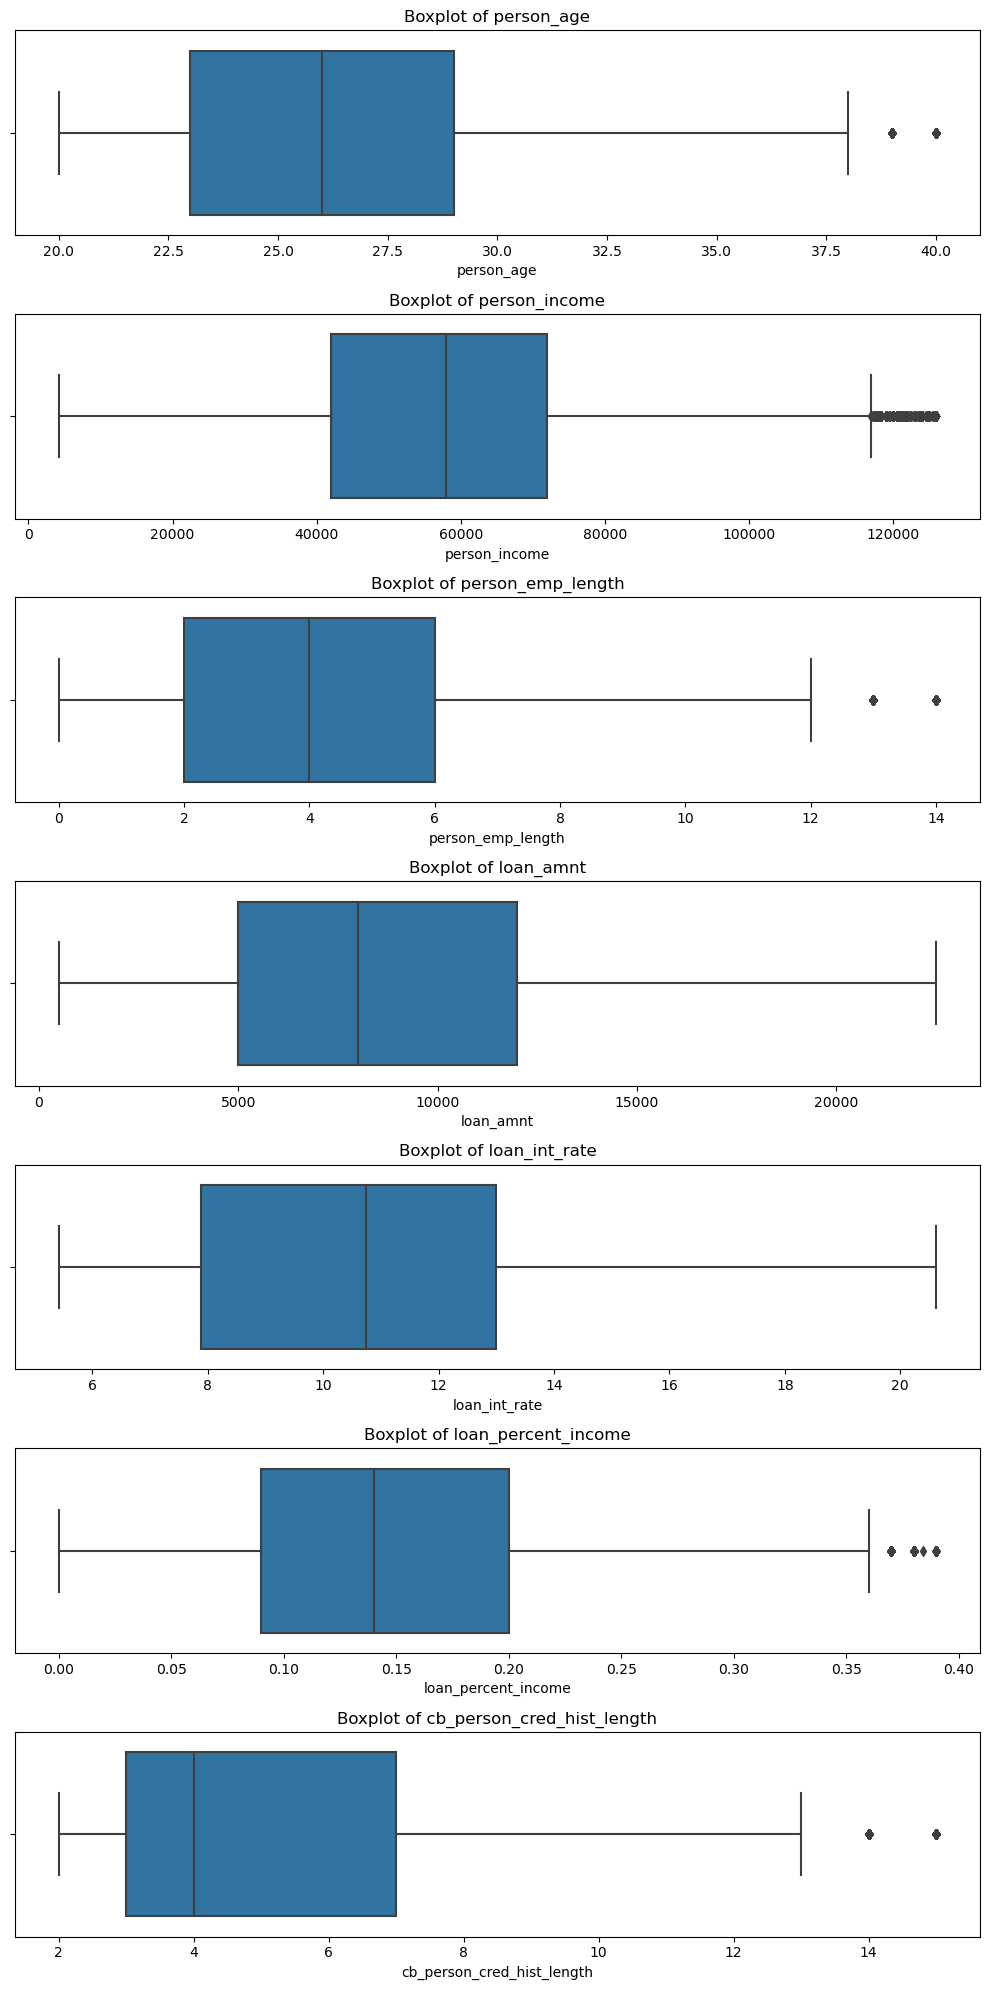

In [127]:
# train
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()

plt.show()


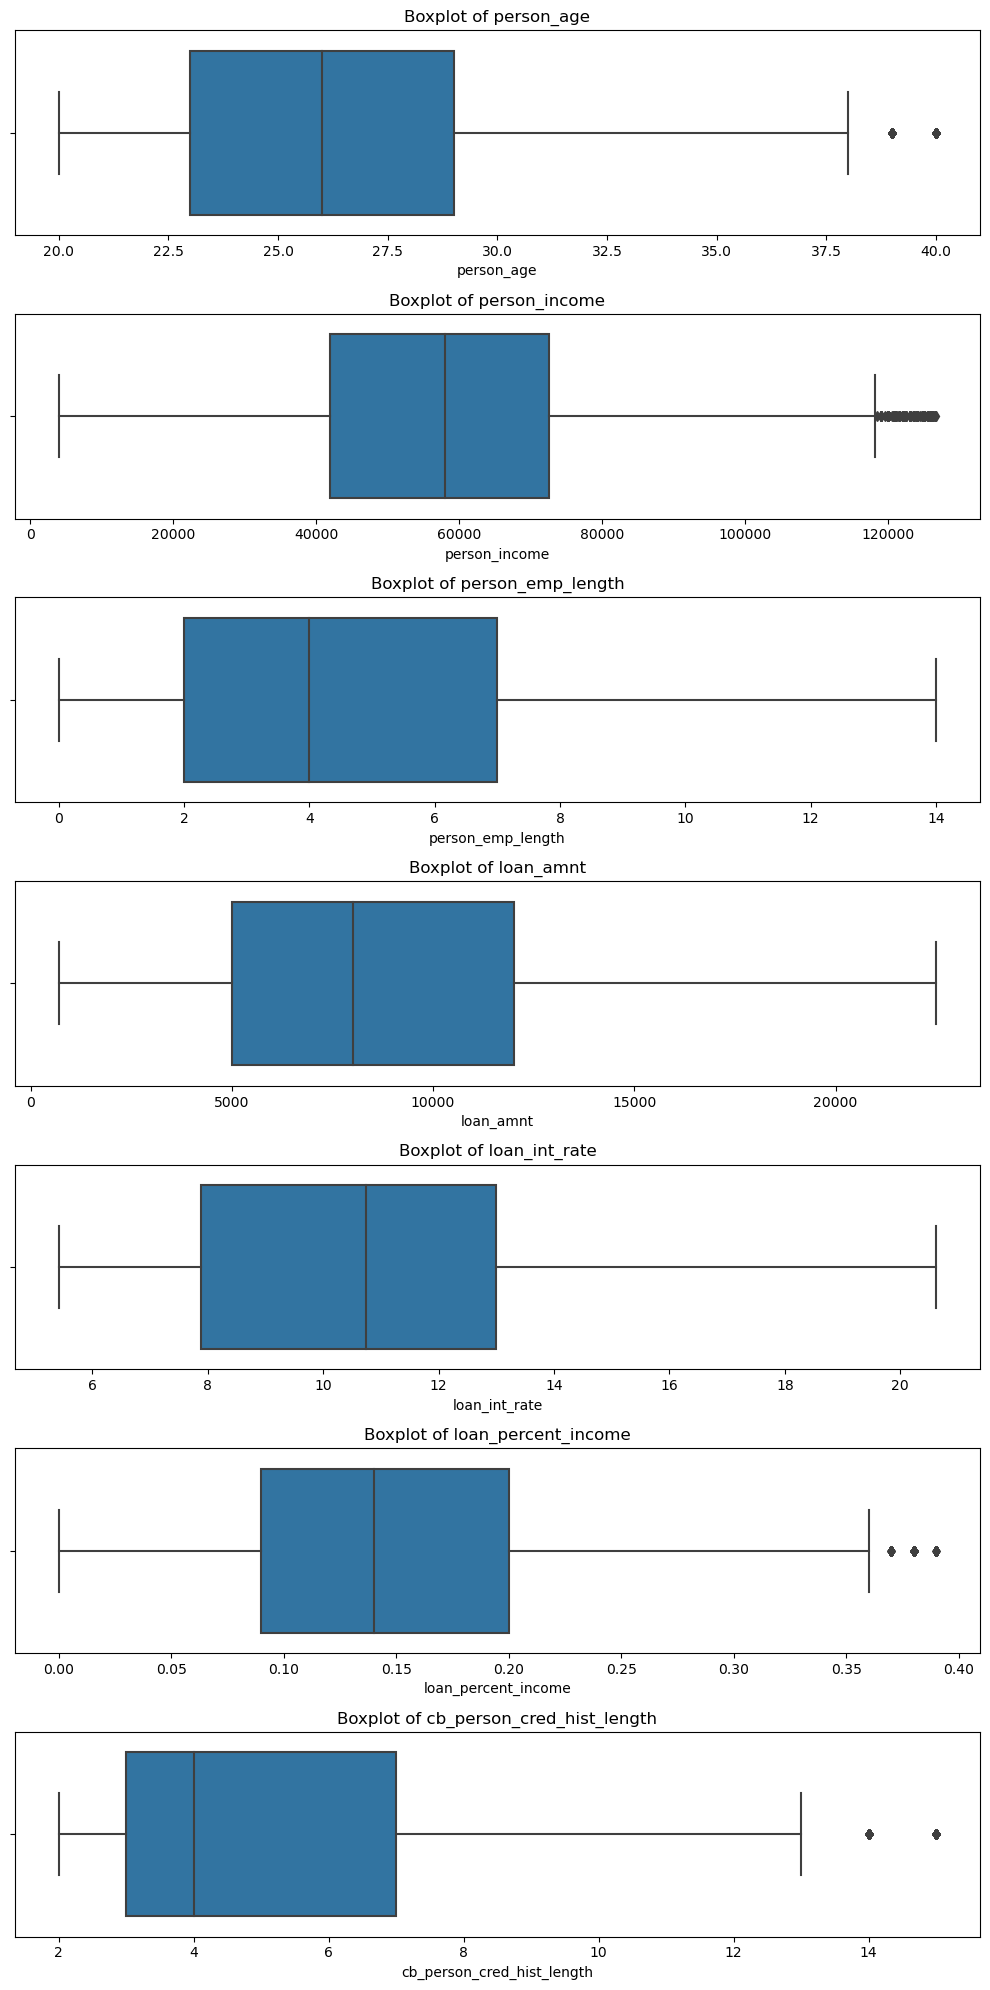

In [128]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(10, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  
    sns.boxplot(x=test[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()

plt.show()

### 4. Encoding for catgorical columns

In [129]:
train['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [130]:
train['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [131]:
train['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [132]:
train['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [133]:
# oridnal encoding train
train_encoder = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']])
train['loan_grade'] = train_encoder.fit_transform(train[['loan_grade']])

train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37.0,35000.0,RENT,0.0,EDUCATION,1.0,6000.0,11.49,0.17,N,14.0,0
1,22.0,56000.0,OWN,6.0,MEDICAL,2.0,4000.0,13.35,0.07,N,2.0,0
2,29.0,28800.0,OWN,8.0,PERSONAL,0.0,6000.0,8.90,0.21,N,10.0,0
3,30.0,70000.0,RENT,14.0,VENTURE,1.0,12000.0,11.11,0.17,N,5.0,0
4,22.0,60000.0,RENT,2.0,MEDICAL,0.0,6000.0,6.92,0.10,N,3.0,0


In [134]:
# ordinal encoding test
test_encoder = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']])
test['loan_grade'] = test_encoder.fit_transform(test[['loan_grade']])

test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23.0,69000.0,RENT,3.0,HOMEIMPROVEMENT,5.0,8000.0,15.76,0.36,N,2.0
1,26.0,96000.0,MORTGAGE,6.0,PERSONAL,2.0,10000.0,12.68,0.10,Y,4.0
2,26.0,30000.0,RENT,5.0,VENTURE,4.0,4000.0,17.19,0.13,Y,2.0
3,33.0,50000.0,RENT,4.0,DEBTCONSOLIDATION,0.0,7000.0,8.90,0.14,N,7.0
4,26.0,102000.0,MORTGAGE,8.0,HOMEIMPROVEMENT,3.0,15000.0,16.32,0.15,Y,4.0


In [135]:
# ohe train
train = pd.get_dummies(train, columns=['person_home_ownership','loan_intent','cb_person_default_on_file'],drop_first=True)

train.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,37.0,35000.0,0.0,1.0,6000.0,11.49,0.17,14.0,0,0,0,1,1,0,0,0,0,0
1,22.0,56000.0,6.0,2.0,4000.0,13.35,0.07,2.0,0,0,1,0,0,0,1,0,0,0
2,29.0,28800.0,8.0,0.0,6000.0,8.90,0.21,10.0,0,0,1,0,0,0,0,1,0,0
3,30.0,70000.0,14.0,1.0,12000.0,11.11,0.17,5.0,0,0,0,1,0,0,0,0,1,0
4,22.0,60000.0,2.0,0.0,6000.0,6.92,0.10,3.0,0,0,0,1,0,0,1,0,0,0


In [136]:
# ohe test
test = pd.get_dummies(test, columns=['person_home_ownership','loan_intent','cb_person_default_on_file'],drop_first=True)

test.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,23.0,69000.0,3.0,5.0,8000.0,15.76,0.36,2.0,0,0,1,0,1,0,0,0,0
1,26.0,96000.0,6.0,2.0,10000.0,12.68,0.10,4.0,0,0,0,0,0,0,1,0,1
2,26.0,30000.0,5.0,4.0,4000.0,17.19,0.13,2.0,0,0,1,0,0,0,0,1,1
3,33.0,50000.0,4.0,0.0,7000.0,8.90,0.14,7.0,0,0,1,0,0,0,0,0,0
4,26.0,102000.0,8.0,3.0,15000.0,16.32,0.15,4.0,0,0,0,0,1,0,0,0,1


In [137]:
train.shape

(58645, 18)

In [138]:
test.shape

(39098, 17)

## 5. Scaling

In [139]:
# train
scaler_train = StandardScaler()

columns_to_scale = train.columns.difference(['loan_status'])

train[columns_to_scale] = scaler_train.fit_transform(train[columns_to_scale])
train.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,2.340527,-1.053466,-1.303984,-0.063697,-0.570919,0.270616,0.204444,2.687589,0,-0.038986,-0.237768,0.957538,1.944005,-0.346305,-0.478719,-0.453837,-0.4537,-0.417419
1,-1.067971,-0.147581,0.471877,0.892168,-1.010895,0.885750,-1.009514,-1.031856,0,-0.038986,4.205788,-1.044345,-0.514402,-0.346305,2.088910,-0.453837,-0.4537,-0.417419
2,0.522662,-1.320918,1.063831,-1.019563,-0.570919,-0.585941,0.690027,1.447774,0,-0.038986,4.205788,-1.044345,-0.514402,-0.346305,-0.478719,2.203436,-0.4537,-0.417419
3,0.749895,0.456342,2.839693,-0.063697,0.749012,0.144944,0.204444,-0.101995,0,-0.038986,-0.237768,0.957538,-0.514402,-0.346305,-0.478719,-0.453837,2.2041,-0.417419
4,-1.067971,0.024968,-0.712030,-1.019563,-0.570919,-1.240761,-0.645327,-0.721902,0,-0.038986,-0.237768,0.957538,-0.514402,-0.346305,2.088910,-0.453837,-0.4537,-0.417419


<Axes: >

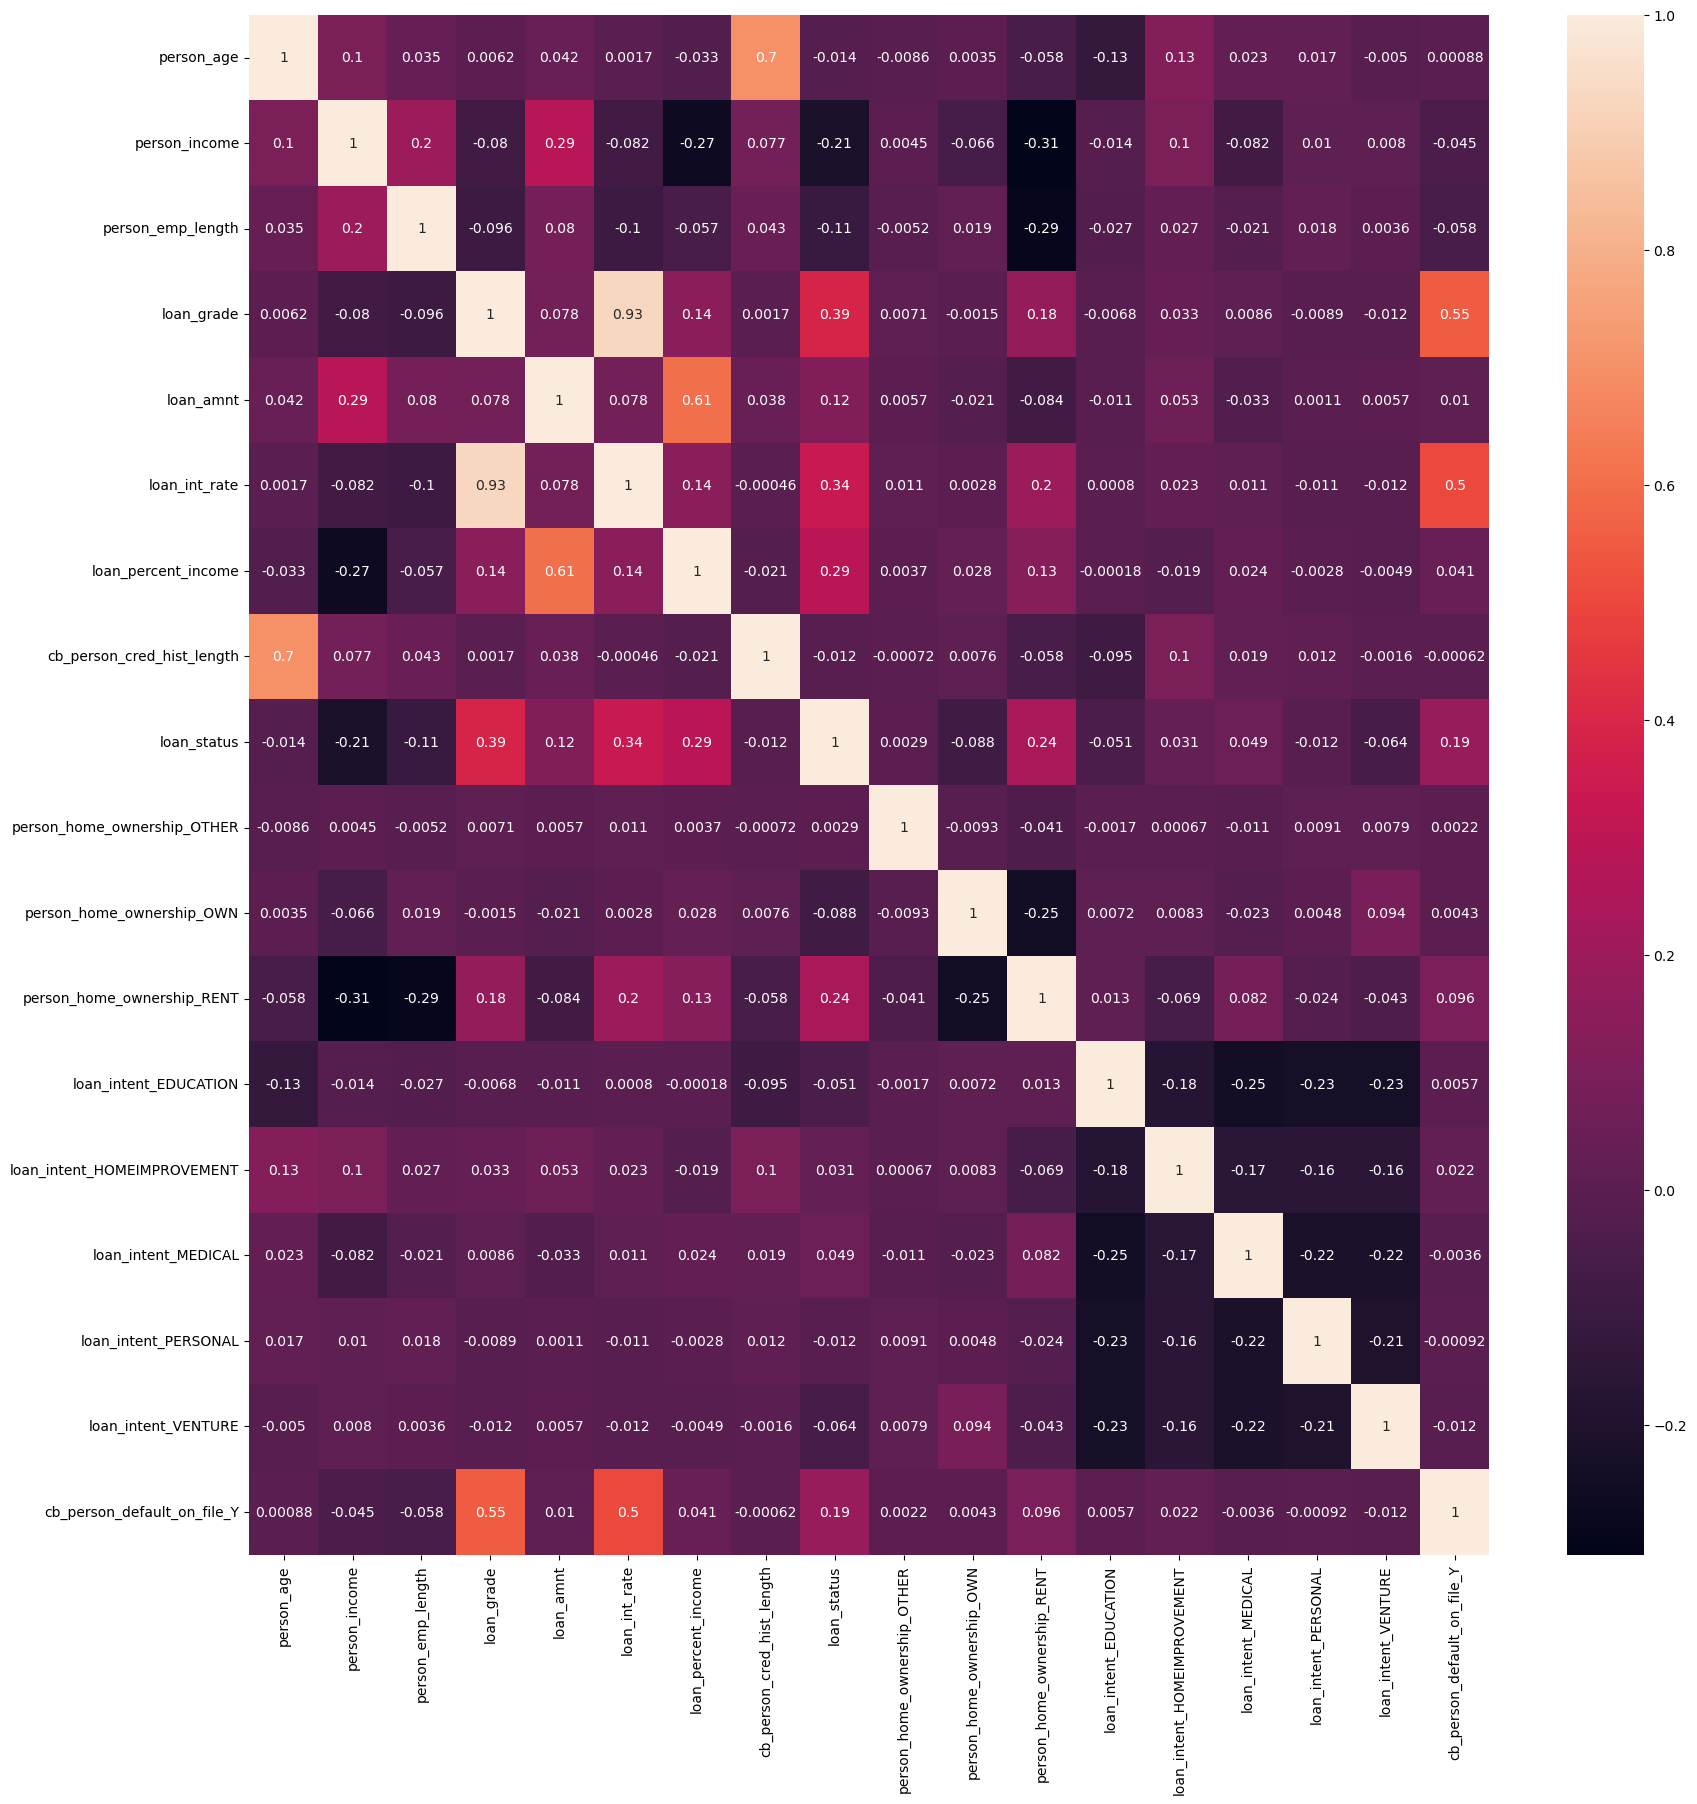

In [143]:
fig = plt.figure(figsize=(20, 20))

sns.heatmap(train.corr(),annot=True)

In [140]:
# test
scaler_train = StandardScaler()

columns_to_scale = test.columns

test[columns_to_scale] = scaler_train.fit_transform(test[columns_to_scale])
test.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,-0.845413,0.406367,-0.419048,3.788284,-0.135750,1.692245,2.515111,-1.031867,-0.044996,-0.235594,0.963280,-0.510227,2.877555,-0.485062,-0.459458,-0.451968,-0.420349
1,-0.162847,1.569457,0.468057,0.902528,0.305652,0.670618,-0.650461,-0.407889,-0.044996,-0.235594,-1.038119,-0.510227,-0.347517,-0.485062,2.176477,-0.451968,2.378973
2,-0.162847,-1.273651,0.172355,2.826366,-1.018555,2.166572,-0.285203,-1.031867,-0.044996,-0.235594,0.963280,-0.510227,-0.347517,-0.485062,-0.459458,2.212545,2.378973
3,1.429808,-0.412103,-0.123346,-1.021310,-0.356452,-0.583197,-0.163450,0.528078,-0.044996,-0.235594,0.963280,-0.510227,-0.347517,-0.485062,-0.459458,-0.451968,-0.420349
4,-0.162847,1.827921,1.059460,1.864447,1.409158,1.877996,-0.041697,-0.407889,-0.044996,-0.235594,-1.038119,-0.510227,2.877555,-0.485062,-0.459458,-0.451968,2.378973


<Axes: >

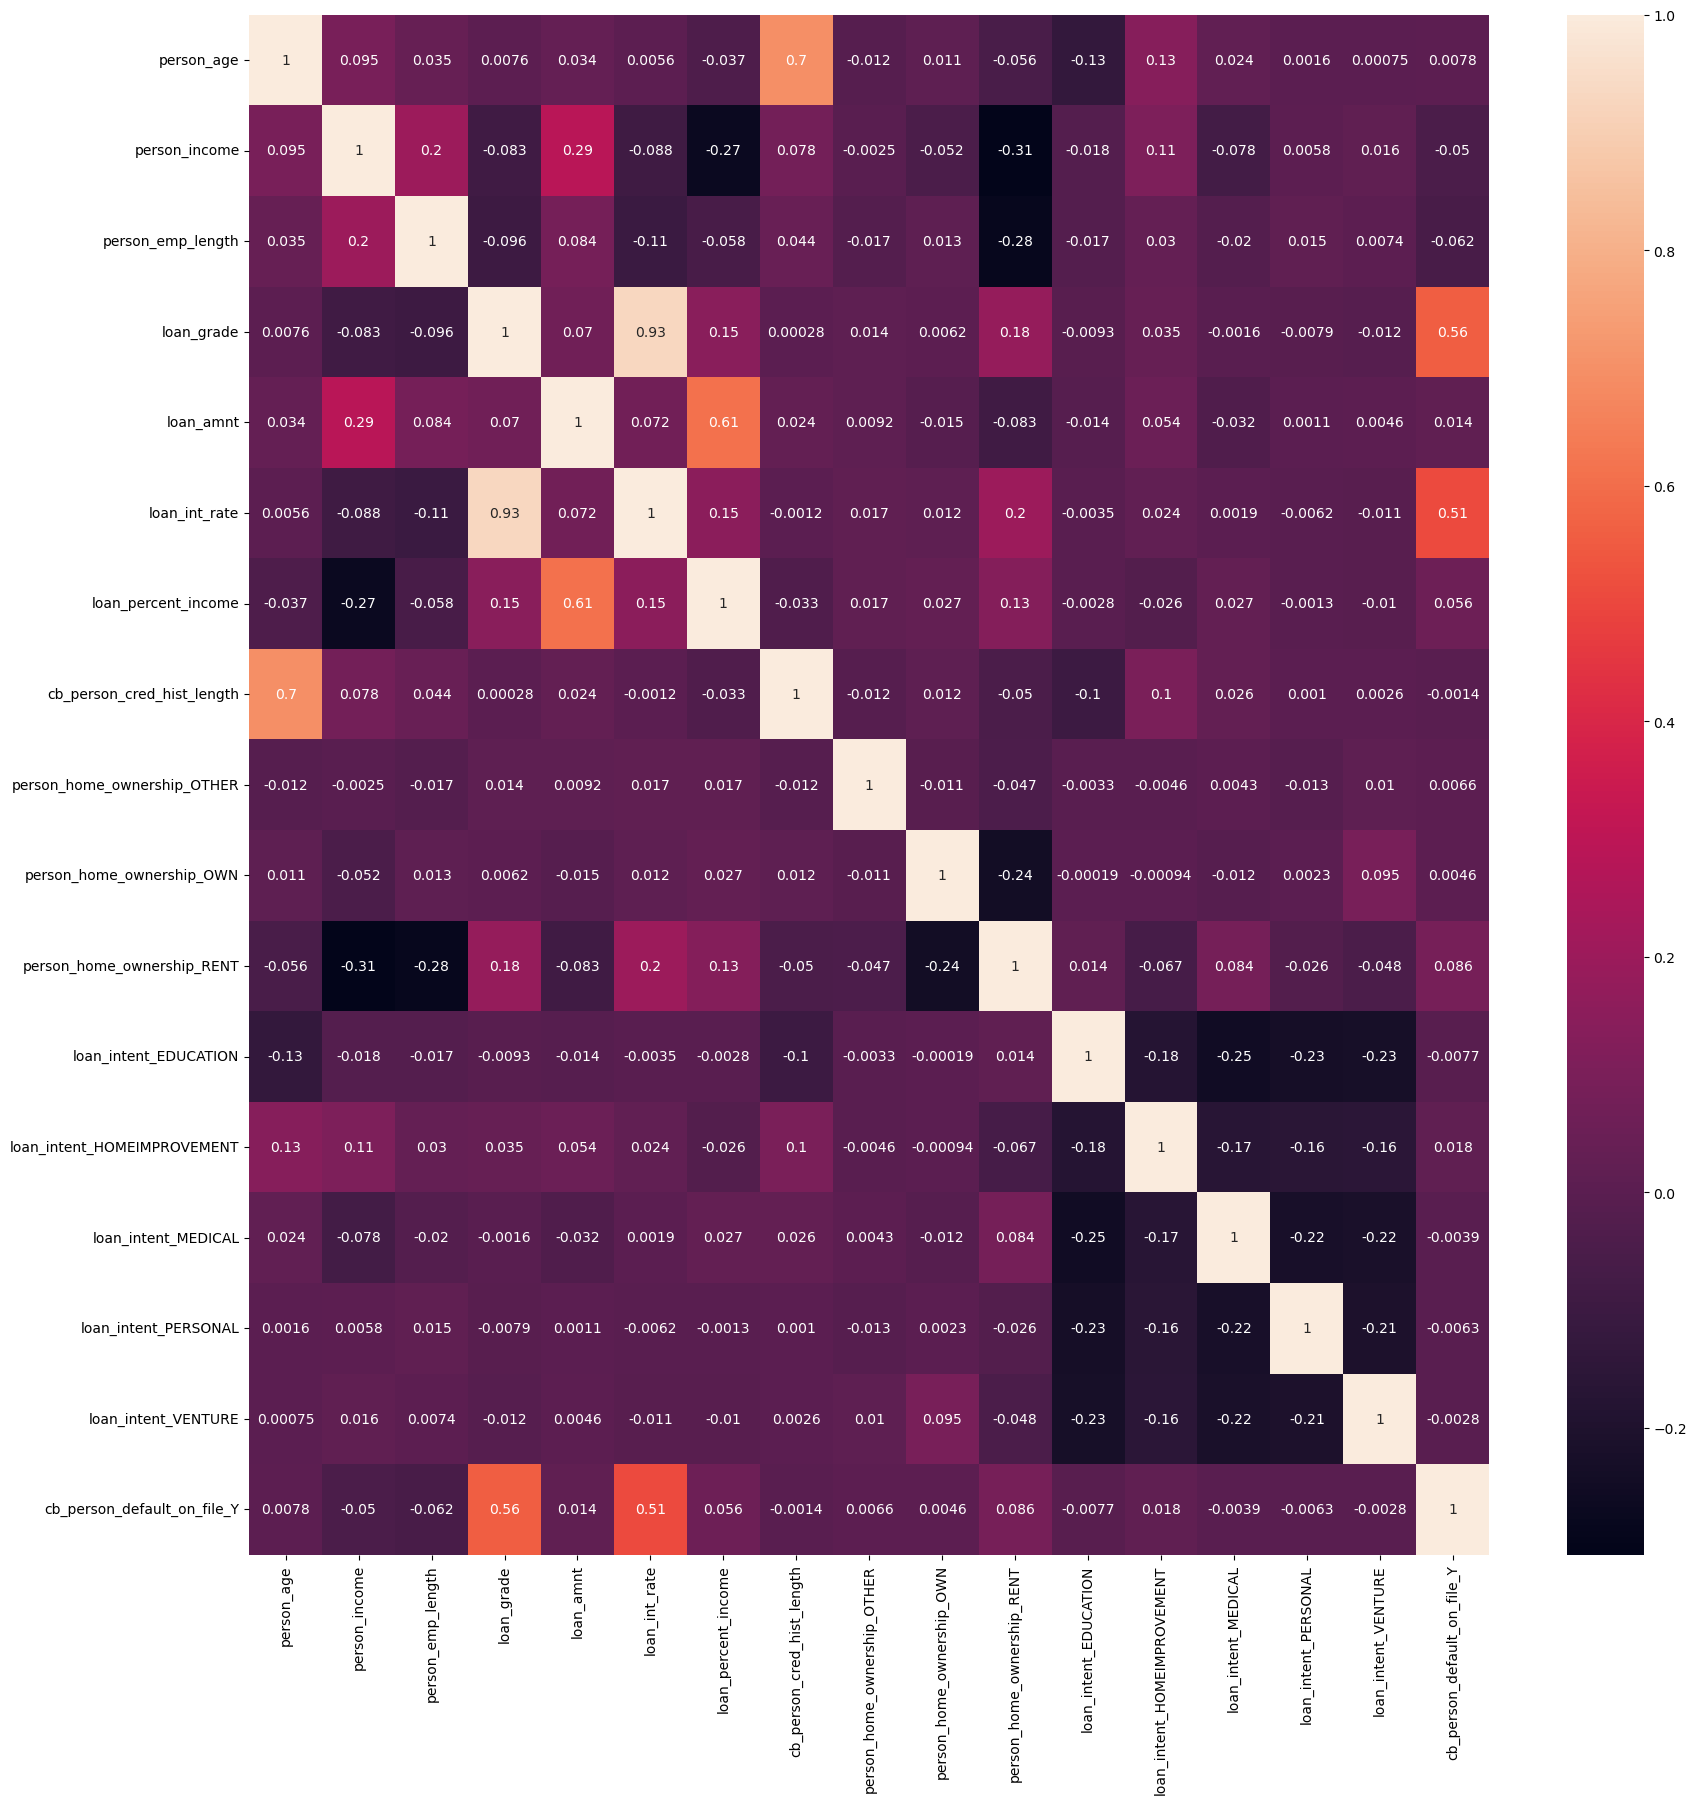

In [144]:
fig = plt.figure(figsize=(20, 20))

sns.heatmap(test.corr(),annot=True)

## Splitting train data

In [163]:
X_train = train.drop(columns=['loan_status'])  
y_train = train['loan_status'] 

In [165]:
X_test = test

## Model

### 1. Logistic Regression

In [164]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [166]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [162]:
# calculate roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [158]:
# calculate auc
roc_auc = auc(fpr, tpr)

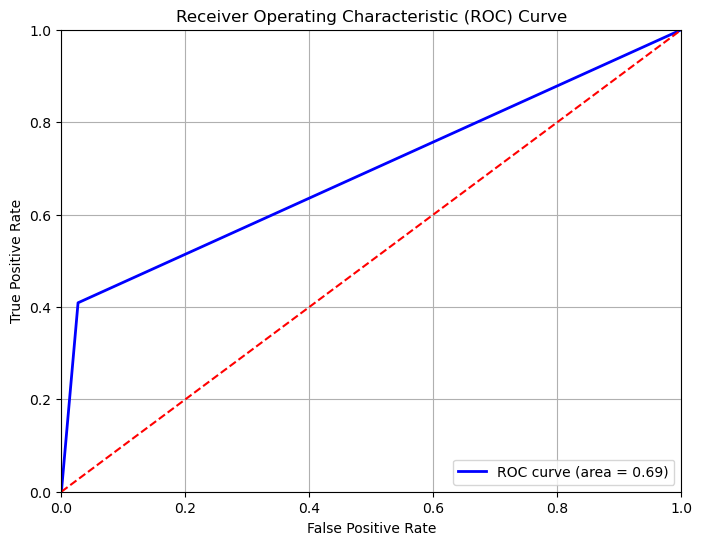

In [159]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [160]:
print(f'AUC: {roc_auc:.2f}')

AUC: 0.69
